In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2018)

In [5]:
### part a: generate feature vectors
num_dim = 100
num_cells = 500

v1,v2,v3 = np.random.randn(3,num_dim)
norm = np.dot(v1,v1)
v1 /= norm
norm = np.dot(v2,v2)
v2 /= norm
norm = np.dot(v3,v3)
v3 /= norm

In [7]:
### part b: check out their scalar products:
print("\nPart B: Scalar products:")
print("v_1 . v_2  = {0}".format(np.dot(v1,v2)))
print("v_1 . v_3  = {0}".format(np.dot(v1,v3)))
print("v_2 . v_3  = {0}".format(np.dot(v3,v2)))


Part B: Scalar products:
v_1 . v_2  = -0.0019973258091490974
v_1 . v_3  = 0.00016131224735477657
v_2 . v_3  = 0.0014993192384640925


In [9]:
### part c: create a dataset using 3 secret variables (zero-mean, given variance)
a_vect = np.sqrt(20)*np.random.randn(num_cells) + 0
b_vect = np.sqrt(5)*np.random.randn(num_cells) + 0
c_vect = np.sqrt(0.5)*np.random.randn(num_cells) + 0

data = np.zeros((num_cells,num_dim))
for i in range(num_cells):
    x_i = 0 + a_vect[i]*v1 + b_vect[i]*v2 +c_vect[i]*v3
    data[i] = x_i

In [10]:
### part d: add zero-mean noise
sig = 1
noise = sig*np.random.randn(num_cells,num_dim) + 0
data += noise

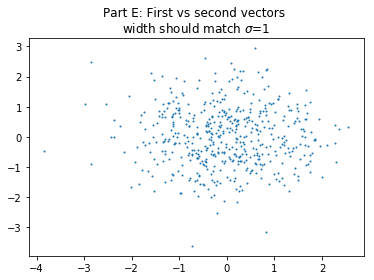

In [11]:
### part e: do we see a correlation b/t the first and second features?
feat1 = data[:, 0]
feat2 = data[:, 1]
plt.figure()
plt.title(f"Part E: First vs second vectors \nwidth should match $\sigma$={sig}")
plt.scatter(feat1,feat2,s=1)

#### Part f: math
For a vector _x_, projected onto a unit vector _u_, the length of 
the projection of x onto u is
$\vec{x}'  =  \hat{u} |x|\cos(\theta) = \hat{u}~\vec{x}\cdot \vec{u}$
The length of this vector is simply $|\vec{x}\cdot \hat{u}|$ which lies somewhere between 0 and $|x|$

G: std dev, 1.1637462817806856, 1.106197069492525


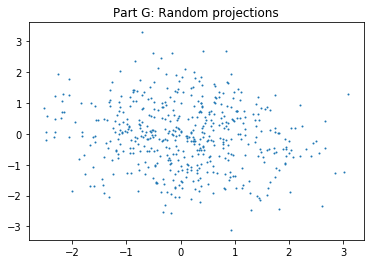

In [12]:
### part g: project onto new vectors
# try to choose a random direction (ie combo of features) 
#   and see if this vector is representative of the data
#   ie does each of num_cells vectors 'match' with this?
unit1, unit2 = np.random.randn(2,num_dim)
unit1 /= np.sqrt( np.dot(unit1,unit1) )
unit2 /= np.sqrt( np.dot(unit2,unit2) )

proj1 = np.dot(data, unit1.T)
proj2 = np.dot(data, unit2.T)
plt.figure()
plt.title("Part G: Random projections")
plt.scatter(proj1, proj2,s=1)
print("G: std dev, {0}, {1}".format(np.var(proj1), np.var(proj2)))

In [14]:
### part h: calculate eigenvectors of covariance matrix
cov = np.dot(data.T,data) /num_cells
eigenvalues, eigenvectors = np.linalg.eig(cov)

# we need to find the highest 3 vectors. 
sort_indices = eigenvalues.argsort()[::-1] ## max should be first
ev = eigenvalues
e_vect_1 = eigenvectors[:, sort_indices[0]]
e_vect_2 = eigenvectors[:, sort_indices[1]]
e_vect_3 = eigenvectors[:, sort_indices[2]]


Part I: var of (1,2,3) projection is (2.005686455241702, 1.9783582465009508, 1.9331826620811772)


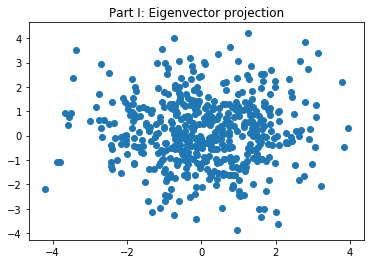

In [16]:
### part i: projection onto primary vectors
# note, eigenvectors are already normalized
proj1 = np.dot(data, e_vect_1)
#proj1 = np.dot(data, e_vect_1)
proj2 = np.dot(data, e_vect_2)
proj3 = np.dot(data, e_vect_3)
var1 = np.var(proj1)
var2 = np.var(proj2)
var3 = np.var(proj3)
print(f"\nPart I: var of (1,2,3) projection is {var1,var2,var3}")
plt.figure()
plt.title("Part I: Eigenvector projection")
plt.scatter(proj1,proj2)


In [17]:
### part j: check that the output matches the input
print("\nPart J: Variable correspondence:")
print("v1.eigen1={0}".format(np.dot(e_vect_1,v1)))
print("v1.eigen2={0}".format(np.dot(e_vect_2,v1)))
print("v1.eigen3={0}".format(np.dot(e_vect_3,v1)))


Part J: Variable correspondence:
v1.eigen1=0.013564192453129845
v1.eigen2=-0.03726864407267612
v1.eigen3=-0.010089868443964799


If these scalar products are +1 then our data vectors are exactly parallel
to the "template vectors" implying accurate prediction by the templates.
-1 indicates anti-alignment which is a trivial consequence of 

While the first two components have been recovered, the third seems to have been lost.
This is due to the fact that the variance, $\lambda_c$ is less than the noise
variance, $\sigma=1$. Ie it is below our "noise floor" as we show next.

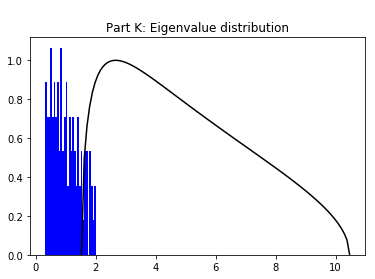

In [24]:
def p(r,size=100):
    lam_plus = sig**2 *(1+np.sqrt(r))**2
    lam_minus = sig**2 *(1-np.sqrt(r))**2
    x = np.linspace(lam_minus,lam_plus,size)
    prob = 1.0/(2*np.pi*sig) *np.sqrt((lam_plus-x)*(x-lam_minus))/r/x
    return x, prob

xs_first, ps_first = p(num_cells/num_dim);
ps_first /= max(ps_first)
plt.figure()
plt.title("\nPart K: Eigenvalue distribution")
plt.plot(xs_first,ps_first, 'k-')

# get eigenspectrum
plt.hist(eigenvalues,bins=30,color='b',density=True);

### part k: compare to Marchenko-Pastur distribution from random matrix theory

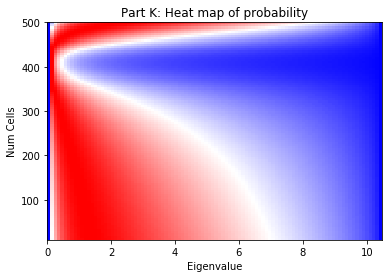

In [39]:
num_datapoints_list = np.linspace(10,500,100)
num_xs = 100
image = np.zeros((len(num_datapoints_list),num_xs))

x_min_bound = np.inf
x_max_bound = -np.inf
for i,num in enumerate(num_datapoints_list):
    xs, ps = p(num/num_dim,num_xs)
    ps /= max(ps)
    image[i, :] = ps
    x_min_bound = min(x_min_bound,min(xs))
    x_max_bound = max(x_max_bound,max(xs))

plt.imshow(image, extent=[x_min_bound,x_max_bound,10,500],aspect='auto',cmap='bwr')    
plt.title("Part K: Heat map of probability")
plt.ylabel("Num Cells")
plt.xlabel("Eigenvalue");
    